<a href="https://colab.research.google.com/github/vineelnoel/fashion-mnist/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Flatten, Conv2D, GlobalMaxPooling2D, Input, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
print(len(set(y_train)))
print(len(set(y_test)))

10
10


In [11]:
K = len(set(y_train))

In [12]:
print(X_train[0].shape)

(28, 28, 1)


In [13]:
i = Input(shape=X_train[0].shape)

In [14]:
x = Conv2D(32, (3, 3), strides=2,activation='relu', padding='same')(i)
x = Conv2D(64, (3, 3), strides=2,activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), strides=2,activation='relu', padding='same')(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4728 - accuracy: 0.8276 - val_loss: 0.3439 - val_accuracy: 0.8705
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3218 - accuracy: 0.8813 - val_loss: 0.2920 - val_accuracy: 0.8899
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8950 - val_loss: 0.2815 - val_accuracy: 0.8940
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2524 - accuracy: 0.9051 - val_loss: 0.2514 - val_accuracy: 0.9088
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2320 - accuracy: 0.9132 - val_loss: 0.2512 - val_accuracy: 0.9077
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2144 - accuracy: 0.9194 - val_loss: 0.2457 - val_accuracy: 0.9090
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2008 - accuracy: 0.9230 - val_loss: 0.2514 - val_accuracy:

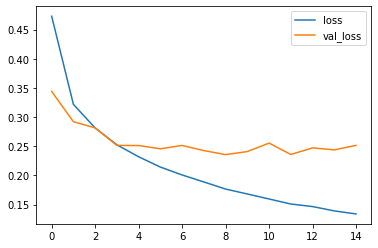

In [16]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

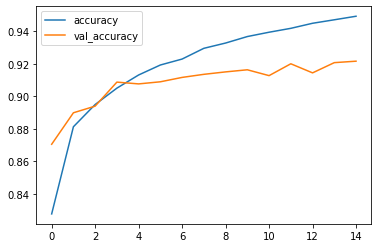

In [17]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion Matrix without normalization
[[912   0  18  10   2   1  49   0   8   0]
 [  1 988   1   6   2   0   0   0   2   0]
 [ 15   1 880   7  57   0  39   0   1   0]
 [ 19   5   8 915  36   0  16   0   1   0]
 [  2   0  39  15 906   0  38   0   0   0]
 [  0   0   0   0   0 981   0  15   0   4]
 [134   2  56  21  74   0 703   0  10   0]
 [  0   0   0   0   0   4   0 985   0  11]
 [  2   1   3   0   3   2   2   1 986   0]
 [  0   0   0   0   0   3   1  35   0 961]]


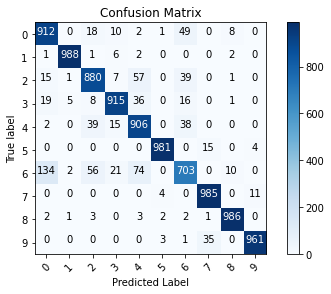

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix without normalization')

  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [19]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

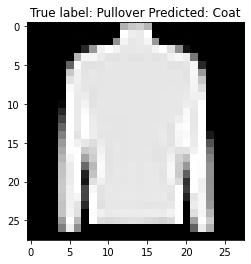

In [24]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));